In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "q2_all_finall.csv"
df = pd.read_csv(file)

In [3]:
df

No.        Time                                      Source  \
0            1    0.000000  AzureWav_16:19:87 (14:13:33:16:19:87) (TA)   
1            2    0.000010                                         NaN   
2            3    0.000012     Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA)   
3            4    0.000015  AzureWav_16:19:87 (14:13:33:16:19:87) (TA)   
4            5    0.000017                                         NaN   
...        ...         ...                                         ...   
262675  262676  314.135303                              Apple_e8:aa:17   
262676  262677  314.135322                                         NaN   
262677  262678  314.135326     Apple_e8:aa:17 (d4:57:63:e8:aa:17) (TA)   
262678  262679  314.135330                                         NaN   
262679  262680  314.135334     Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA)   

                                       Destination Protocol  Length  \
0          Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (RA)   802.11      58   
1       AzureWav_16:19:87 (14:13:33:16:19:87) (RA)   802.11      52   
2       AzureWav_16:19:87 (14:13:33:16:19:87) (RA)   802.11      70   
3          Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (RA)   802.11      58   
4       AzureWav_16:19:87 (14:13:33:16:19:87) (RA)   802.11      52   
...                                            ...      ...     ...   
262675                              Cisco_2d:af:0b   802.11      66   
262676     Apple_e8:aa:17 (d4:57:63:e8:aa:17) (RA)   802.11      52   
262677     Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (RA)   802.11      58   
262678     Apple_e8:aa:17 (d4:57:63:e8:aa:17) (RA)   802.11      52   
262679     Apple_e8:aa:17 (d4:57:63:e8:aa:17) (RA)   802.11      70   

              PHY type     Source address  Data rate Signal strength (dBm)  \
0       802.11a (OFDM)                NaN       24.0               -65 dBm   
1       802.11a (OFDM)                NaN       24.0               -69 dBm   
2       802.11a (OFDM)                NaN       24.0               -65 dBm   
3       802.11a (OFDM)                NaN       24.0               -64 dBm   
4       802.11a (OFDM)                NaN       24.0               -67 dBm   
...                ...                ...        ...                   ...   
262675  802.11a (OFDM)  d4:57:63:e8:aa:17       24.0               -81 dBm   
262676  802.11a (OFDM)                NaN       24.0               -65 dBm   
262677  802.11a (OFDM)                NaN       24.0               -79 dBm   
262678  802.11a (OFDM)                NaN       24.0               -62 dBm   
262679  802.11a (OFDM)                NaN       54.0               -63 dBm   

       Destination address  Time delta from previous captured frame  \
0                      NaN                                 0.000000   
1                      NaN                                 0.000010   
2                      NaN                                 0.000002   
3                      NaN                                 0.000003   
4                      NaN                                 0.000002   
...                    ...                                      ...   
262675   c4:0a:cb:2d:af:0b                                 0.003270   
262676                 NaN                                 0.000019   
262677                 NaN                                 0.000004   
262678                 NaN                                 0.000004   
262679                 NaN                                 0.000004   

        Destination.1                                               Info  
0                 NaN                   Request-to-send, Flags=........C  
1                 NaN                     Clear-to-send, Flags=........C  
2                 NaN                  802.11 Block Ack, Flags=........C  
3                 NaN                   Request-to-send, Flags=........C  
4                 NaN                     Clear-to-send, Flags=........C  
...               ...        

# Part (a)


In [4]:
src_add = list(df["Source address"])
dest_add = list(df["Destination address"])
address = src_add + dest_add

In [5]:
print(np.unique(src_add).size)
print(np.unique(dest_add).size)

2626
724


In [6]:
print("Number of unique MAC addresses: ", np.unique(address).size)

Number of unique MAC addresses:  3047


In [8]:
ap_df = pd.read_csv("wireless_traffic_details.csv")
access_points = list(ap_df["BSSID"].unique())
print("Number of Access points (AP): ", len(access_points))

Number of Access points (AP):  27


In [9]:
clients = list(set(src_add) - set(access_points))
print("Number of Clients: ", len(clients))

Number of Clients:  2616


# Part (b)


In [10]:
client_SS = {}
for client in range(len(clients)):
    
    client_SS[clients[client]] = list(df[df["Source address"] == clients[client]]["Signal strength (dBm)"])
    temp = []
    for x in client_SS[clients[client]]:
        temp.append(float(x.split(" ")[0]))
    
    client_SS[clients[client]] = temp
    client_SS[clients[client]] = np.mean(client_SS[clients[client]])

/home/dheeraj/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dheeraj/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
print("AVG signal strength clients: ")
client_SS

AVG signal strength clients: 


{'d0:49:7c:34:48:8f': -66.47058823529412,
 'f2:c5:50:4f:00:3c': -68.0,
 '14:13:33:f7:7f:e1': -66.53435114503817,
 'c4:0a:cb:25:b1:a0': -91.25,
 'd4:53:83:a3:65:5c': -67.84210526315789,
 'd0:ab:d5:6d:78:92': -70.25,
 '64:49:7d:71:38:6f': -65.66666666666667,
 '88:e9:fe:53:c6:f4': -69.0,
 'ac:57:75:49:07:be': -66.825,
 '04:d3:b0:b8:f6:fa': -65.55555555555556,
 'd0:88:0c:7d:da:ef': -67.44,
 'c6:3c:4d:69:80:7f': -65.86363636363636,
 '6e:76:0a:f9:f1:1a': -65.64285714285714,
 'f2:6d:0e:8f:00:28': -67.85714285714286,
 'f2:6d:1d:8f:00:28': -67.33333333333333,
 '54:14:f3:aa:3a:75': -66.87323943661971,
 '24:29:34:9b:79:b5': -66.0,
 'd6:2d:df:9e:46:3a': -66.4,
 'fc:e2:6c:02:bd:e7': -66.41666666666667,
 '26:92:35:0d:ac:82': -63.0,
 'ac:c9:06:1f:09:fb': -66.11340206185567,
 '58:6c:25:9f:99:fd': -67.11320754716981,
 'f2:78:17:df:00:28': -66.75,
 nan: nan,
 '42:8d:f6:52:85:85': -67.875,
 'f2:77:ad:ef:00:28': -67.0,
 '5c:17:cf:7b:7d:73': -69.0,
 'f4:02:28:41:ea:b5': -65.0,
 'f2:76:17:9f:00:28': -67.6,


# Part (c)


In [12]:
client_data_r = {}
for client in clients:
    client_data_r[client] = list(df[df["Source address"] == client]["Data rate"])
    client_data_r[client] = np.mean(client_data_r[client])

In [13]:
print("Average data rate of clients: ")
client_data_r

Average data rate of clients: 


{'d0:49:7c:34:48:8f': 54.0,
 'f2:c5:50:4f:00:3c': 54.0,
 '14:13:33:f7:7f:e1': 54.0,
 'c4:0a:cb:25:b1:a0': 6.0,
 'd4:53:83:a3:65:5c': 54.0,
 'd0:ab:d5:6d:78:92': 54.0,
 '64:49:7d:71:38:6f': 54.0,
 '88:e9:fe:53:c6:f4': 54.0,
 'ac:57:75:49:07:be': 54.0,
 '04:d3:b0:b8:f6:fa': 54.0,
 'd0:88:0c:7d:da:ef': 54.0,
 'c6:3c:4d:69:80:7f': 54.0,
 '6e:76:0a:f9:f1:1a': 54.0,
 'f2:6d:0e:8f:00:28': 54.0,
 'f2:6d:1d:8f:00:28': 54.0,
 '54:14:f3:aa:3a:75': 54.0,
 '24:29:34:9b:79:b5': 54.0,
 'd6:2d:df:9e:46:3a': 50.8,
 'fc:e2:6c:02:bd:e7': 54.0,
 '26:92:35:0d:ac:82': 54.0,
 'ac:c9:06:1f:09:fb': 54.0,
 '58:6c:25:9f:99:fd': 54.0,
 'f2:78:17:df:00:28': 54.0,
 nan: nan,
 '42:8d:f6:52:85:85': 54.0,
 'f2:77:ad:ef:00:28': 54.0,
 '5c:17:cf:7b:7d:73': 54.0,
 'f4:02:28:41:ea:b5': 54.0,
 'f2:76:17:9f:00:28': 54.0,
 '10:ec:81:86:2d:60': 54.0,
 'b4:8c:9d:55:cd:95': 54.0,
 '28:c5:38:16:1e:8f': 54.0,
 'f2:78:be:2f:00:28': 54.0,
 'f2:6d:12:7f:00:3c': 54.0,
 'd8:a3:15:3e:b7:f9': 54.0,
 '00:93:37:8c:ac:12': 52.3448275862069

# Part (d)


In [14]:
client_df = df[df["Source address"].isin(clients)]
phy_standards_names = client_df["PHY type"].unique()
phy_standards_count = {}

for v in phy_standards_names:
    phy_standards_count[v] = 0

for i in range(len(client_df)):
    phy_standards_count[client_df.iloc[i]["PHY type"]] += 1

In [17]:

for k, v in phy_standards_count.items():
    print(k, "  => used by ", v, "clients")

802.11a (OFDM)   => used by  236414 clients
802.11n (HT)   => used by  1662 clients


# Part(e)


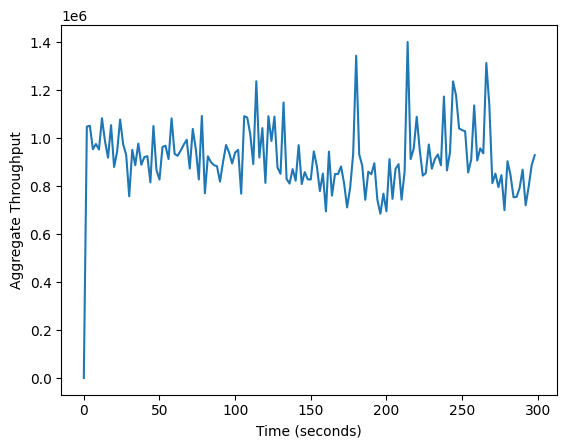

In [15]:
seconds = 300
i = 0
throughput = []
window = 0

while window < seconds:
    sum = 0
    while i < len(df) and df.iloc[i]["Time"] <= window  :
        sum += df.iloc[i]["Length"]
        i += 1
    throughput.append(sum * 8 / 2)
    window += 2

import matplotlib.pyplot as plt

plt.plot(range(0, seconds, 2), throughput)
plt.xlabel("Time (seconds)")
plt.ylabel("Aggregate Throughput")
plt.show()
